## Visualizing Palestine ----- Geospatial Analysis (Gaza & West Bank)

  ## Palestine ❤️ <br /> 


2024-08-22 18:48:35,407 INFO:Processing sub-region 1/16
2024-08-22 18:49:11,058 INFO:Successfully downloaded road network for sub-region 1
2024-08-22 18:49:18,299 INFO:Successfully converted graph to GeoDataFrames for sub-region 1
2024-08-22 18:49:18,544 INFO:Completed processing sub-region 1
2024-08-22 18:49:18,545 INFO:Processing sub-region 2/16
2024-08-22 18:49:21,712 INFO:Successfully downloaded road network for sub-region 2
2024-08-22 18:49:21,894 INFO:Successfully converted graph to GeoDataFrames for sub-region 2
2024-08-22 18:49:22,301 INFO:Completed processing sub-region 2
2024-08-22 18:49:22,302 INFO:Processing sub-region 3/16
2024-08-22 18:49:22,467 ERROR:Error processing sub-region 3: No data elements in server response. Check query location/filters and log.
2024-08-22 18:49:22,468 INFO:Processing sub-region 4/16
2024-08-22 18:49:22,632 ERROR:Error processing sub-region 4: No data elements in server response. Check query location/filters and log.
2024-08-22 18:49:22,633 INFO

(34.144288235, 35.611502664999996, 31.15235714, 32.61869806)

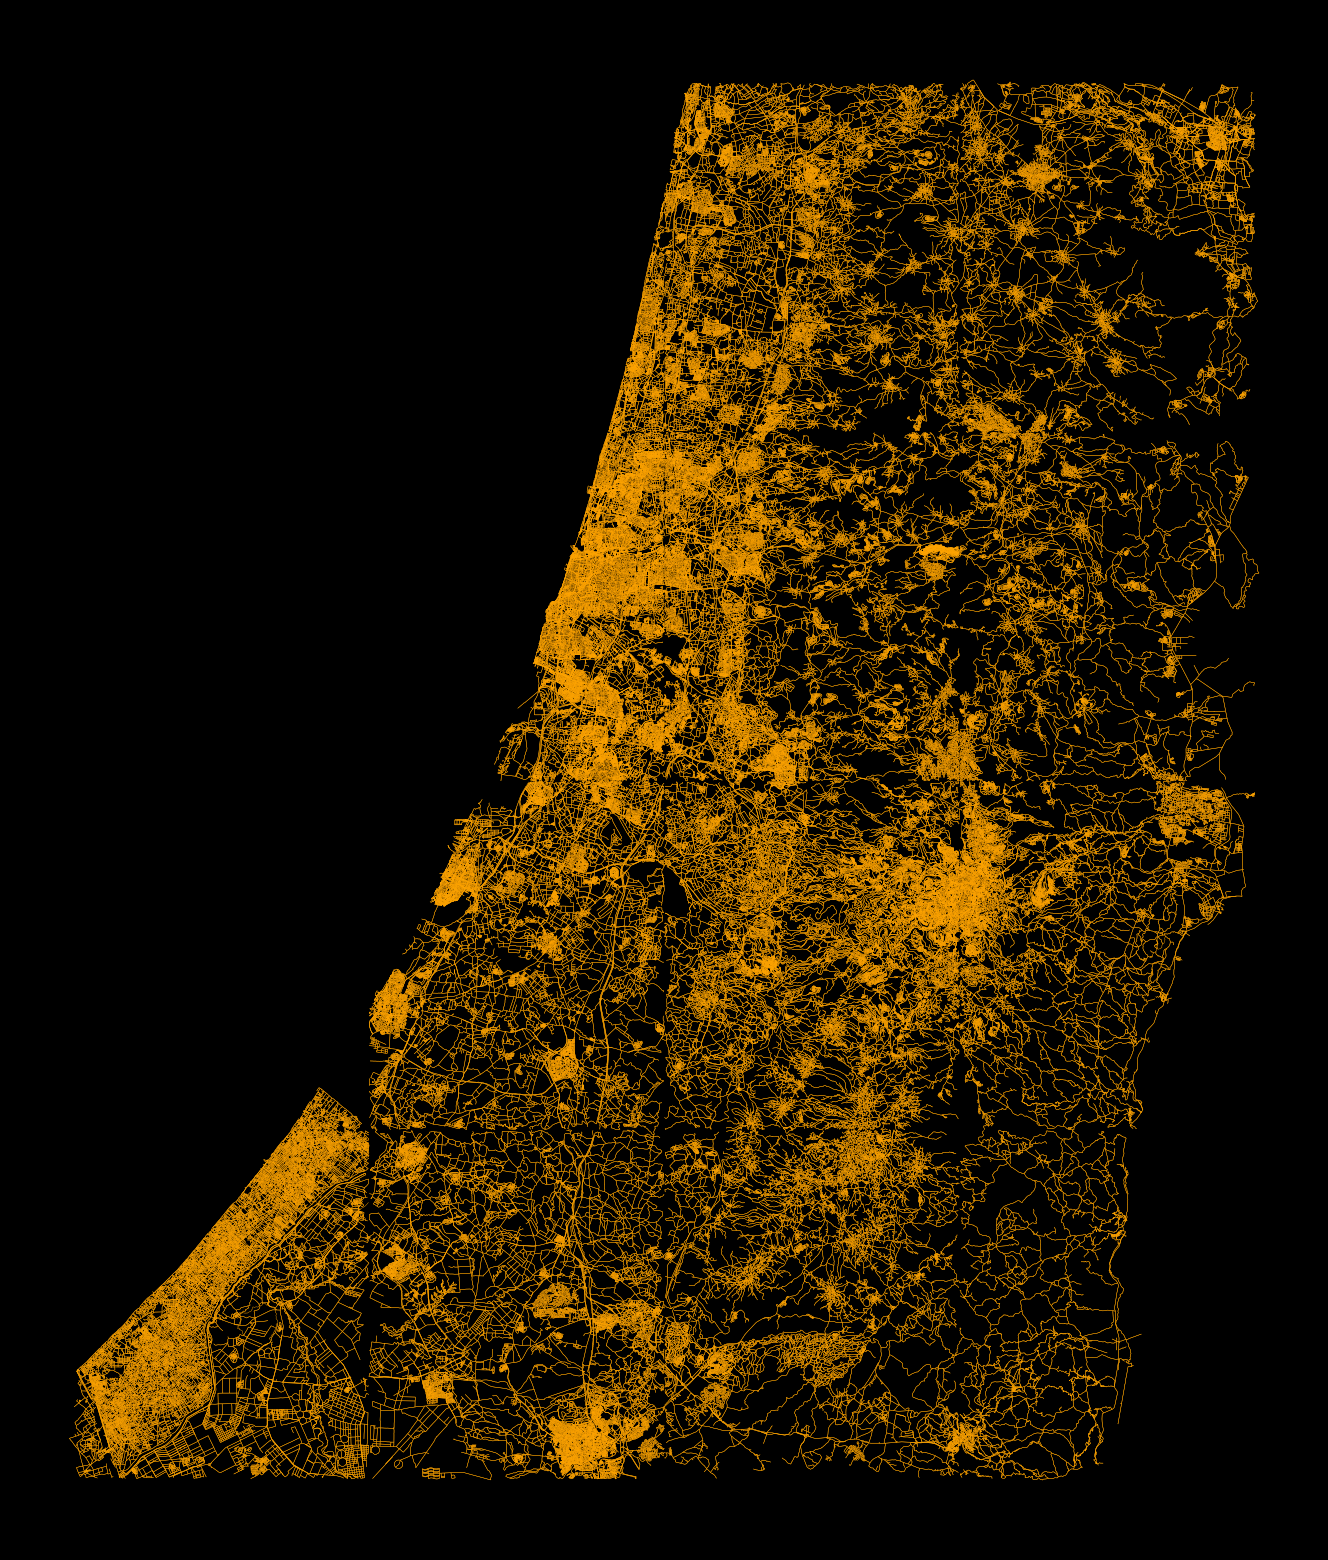

In [12]:
# Set up logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO, 
                    format='%(asctime)s %(levelname)s:%(message)s')

# Divide the region into smaller sub-regions
def subdivide_polygon(polygon, num_divisions):
    minx, miny, maxx, maxy = polygon.bounds
    width = (maxx - minx) / num_divisions
    height = (maxy - miny) / num_divisions

    sub_polygons = []
    for i in range(num_divisions):
        for j in range(num_divisions):
            sub_minx = minx + i * width
            sub_miny = miny + j * height
            sub_maxx = sub_minx + width
            sub_maxy = sub_miny + height
            sub_poly = shapely.geometry.box(sub_minx, sub_miny, sub_maxx, sub_maxy)
            sub_polygons.append(sub_poly)
    return sub_polygons


# Get the geometry for Gaza and the West Bank
gaza = ox.geocode_to_gdf('Gaza Strip')
west_bank = ox.geocode_to_gdf('West Bank')
gaza_poly = gaza.geometry.values[0]
west_bank_poly = west_bank.geometry.values[0]

# Combine the geometries
combined_poly = gpd.GeoSeries([gaza_poly, west_bank_poly]).unary_union

# Subdivide the polygon
sub_polygons = subdivide_polygon(combined_poly, num_divisions=4)

# Initialize empty lists for nodes and edges
all_nodes = []
all_edges = []



# Process each sub-region
for i, sub_poly in enumerate(sub_polygons):
    logging.info(f"Processing sub-region {i+1}/{len(sub_polygons)}")
    
    # Download the road network for the sub-region
    try:
        G = ox.graph_from_polygon(sub_poly)
        logging.info(f"Successfully downloaded road network for sub-region {i+1}")
    except Exception as e:
        logging.error(f"Error processing sub-region {i+1}: {e}")
        continue

    # Convert the graph to GeoDataFrames
    try:
        nodes, edges = ox.graph_to_gdfs(G)
        logging.info(f"Successfully converted graph to GeoDataFrames for sub-region {i+1}")
    except Exception as e:
        logging.error(f"Error converting graph to GeoDataFrames for sub-region {i+1}: {e}")
        continue

    # Append to the main lists
    all_nodes.append(nodes)
    all_edges.append(edges)

    # Explicitly call garbage collection
    gc.collect()
    logging.info(f"Completed processing sub-region {i+1}")

    
    
# Concatenate all nodes and edges
try:
    all_nodes = pd.concat(all_nodes, ignore_index=True)
    all_edges = pd.concat(all_edges, ignore_index=True)
    logging.info("Successfully concatenated all nodes and edges")
except Exception as e:
    logging.error(f"Error concatenating nodes and edges: {e}")
    
    

 # Plot the edges
plt.style.use('dark_background')
f, ax = plt.subplots(1, 1, figsize=(20, 20))
all_edges.plot(ax=ax, edgecolor='Orange', linewidth=0.3)
ax.axis('off')   

## Palestine will be free !!